📁 Upload your EIS CSV files now…


Saving SR550_1h.csv to SR550_1h.csv
Saving SR500_1h.csv to SR500_1h.csv
Saving SR450_1h.csv to SR450_1h.csv
Saving SR400_1h.csv to SR400_1h.csv
Saving SA1100_15min.csv to SA1100_15min.csv
Saving AS.csv to AS.csv
Saved: Nyquist_kohmcm2_all.png, Nyquist_kohmcm2_all.svg


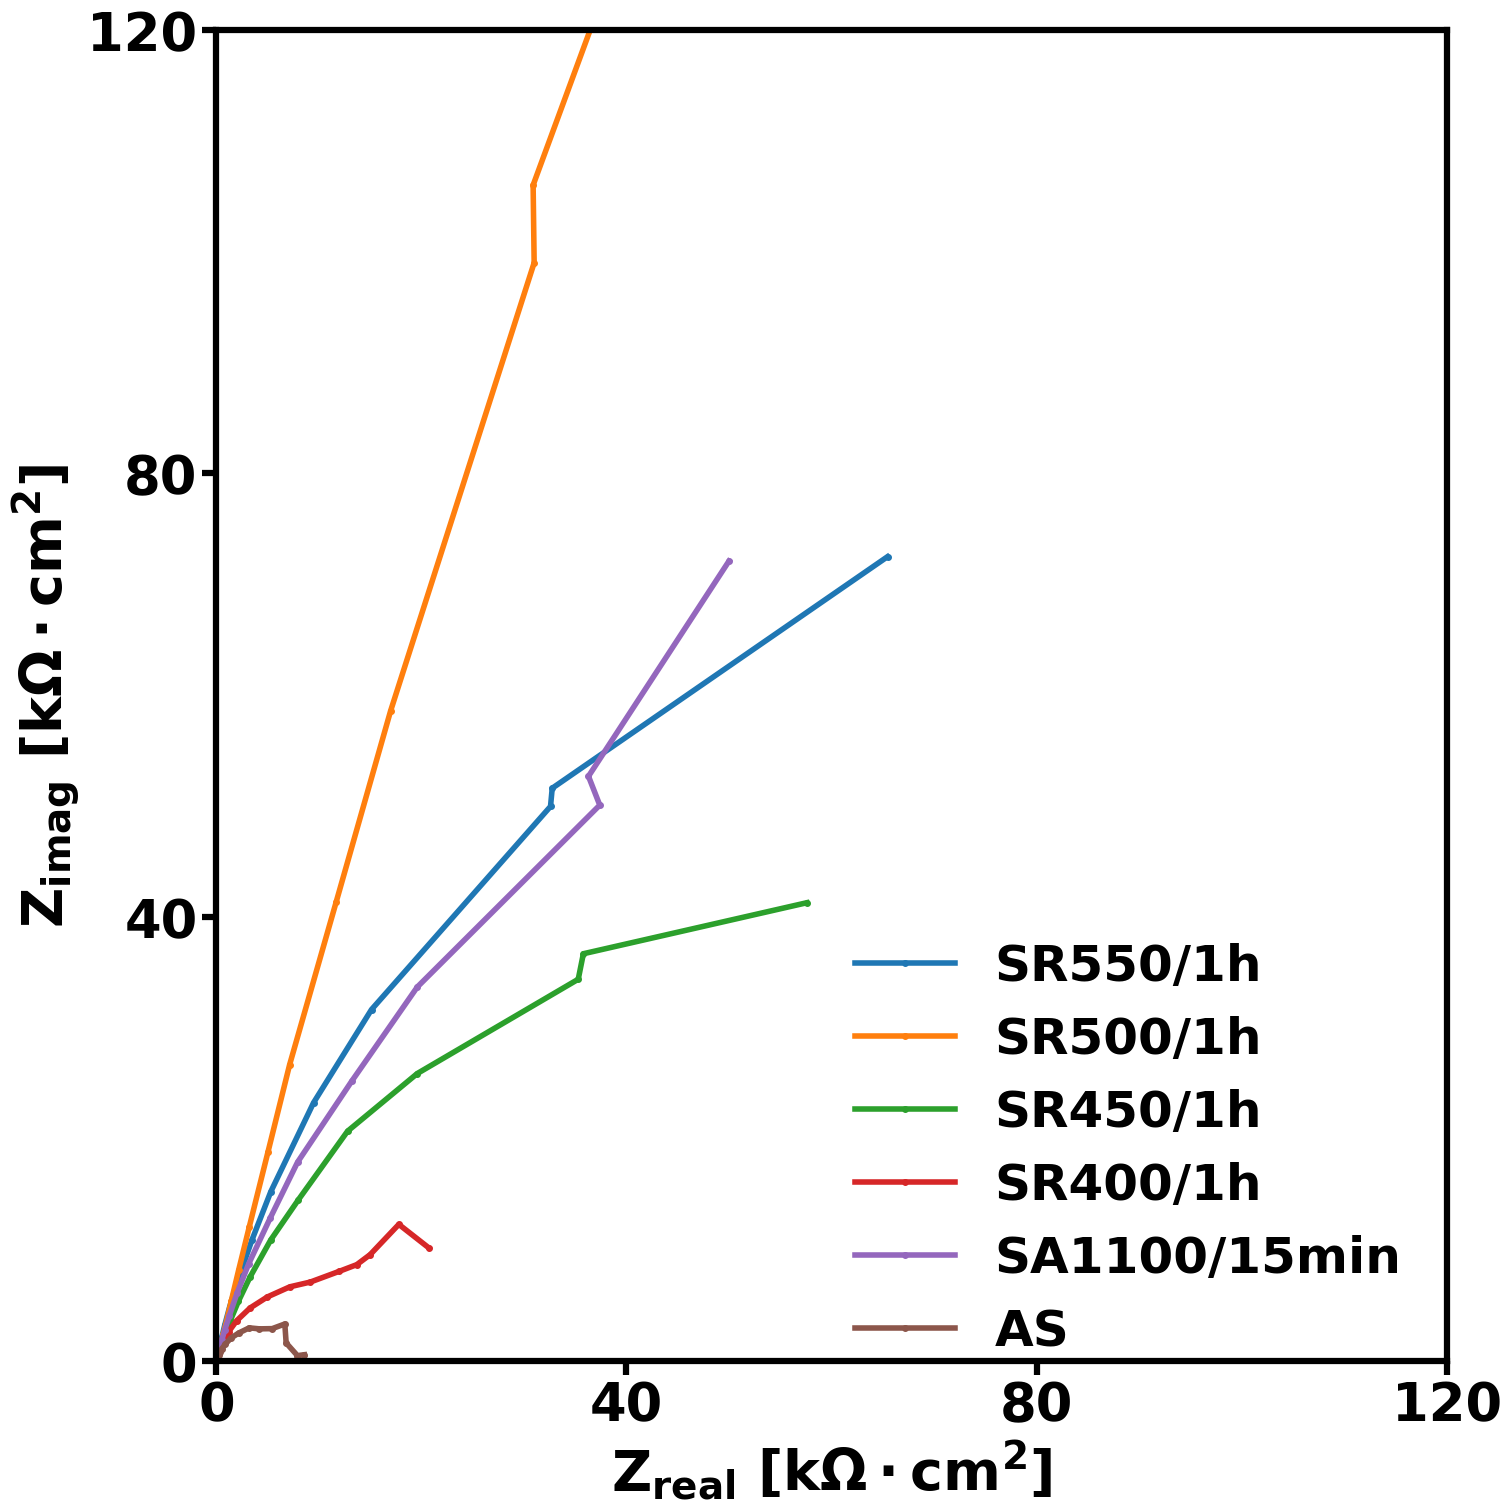

In [10]:
# Nyquist plotter for EIS CSVs — Google Colab version (with upload)
# Spec:
# - Axes ticks: 0, 40, 80, 120 (both axes)
# - Figure size: (14, 14)
# - Tick labels: size 40, bold
# - Axis labels: size 42, bold (math labels bold with \mathbf{})
# - Legend: bottom-right (nudged down), size 38, bold
# - Frame (spines) thickness: 5
# - Plot line width: 4, marker size: 4.5
# CSV must have: ReZx[Ohm*cm2], -ImZx[Ohm*cm2]  (fallback: first two numeric cols)

import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
from google.colab import files  # Colab import

# ---- Make math text actually look bold ----
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['mathtext.default'] = 'regular'

# ==== CONFIG ====
FIGSIZE = (15, 15)
TICK_VALUES = [0, 40, 80, 120]
TICK_FONTSIZE = 38
LABEL_FONTSIZE = 40
LABEL_FONTWEIGHT = 'bold'
LEGEND_FONTSIZE = 36
FRAME_LINEWIDTH = 4.5
LINE_WIDTH = 4.0
MARKER_SIZE = 4.0
OUTPUT_PNG = "Nyquist_kohmcm2_all.png"
OUTPUT_SVG = "Nyquist_kohmcm2_all.svg"

# ==== UPLOAD FILES ====
print("📁 Upload your EIS CSV files now…")
uploaded = files.upload()   # pick AS.csv, SR400_1h.csv, etc.
paths = list(uploaded.keys())
if not paths:
    raise RuntimeError("No CSVs uploaded.")

# ---- Legend label mapping (filename stem -> pretty label) ----
LABEL_MAP = {
    "AS": "AS",
    "SR400_1h": "SR400/1h",
    "SR450_1h": "SR450/1h",
    "SR500_1h": "SR500/1h",
    "SR550_1h": "SR550/1h",
    "SA1100_15min": "SA1100/15min",
}
def clean_label(path: str) -> str:
    stem = Path(path).stem
    return LABEL_MAP.get(stem, stem)  # fallback to stem if not in map

# Smart CSV reader that tries common separators
def read_two_cols(path):
    for sep in [",", ";", "\t"]:
        try:
            df = pd.read_csv(path, sep=sep)
            if df.shape[1] >= 2:
                return df
        except Exception:
            pass
    raise RuntimeError(f"Could not parse {path}")

# ==== PLOT ====
plt.close('all')  # avoid duplicate artists on re-run
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

for path in paths:
    df = read_two_cols(path)
    cols = list(df.columns)

    if 'ReZx[Ohm*cm2]' in cols and '-ImZx[Ohm*cm2]' in cols:
        Rex = pd.to_numeric(df['ReZx[Ohm*cm2]'], errors='coerce').to_numpy()
        NegImx = pd.to_numeric(df['-ImZx[Ohm*cm2]'], errors='coerce').to_numpy()
    else:
        numdf = df.apply(pd.to_numeric, errors='coerce').select_dtypes(include=['number'])
        if numdf.shape[1] < 2:
            raise RuntimeError(f"{path}: cannot find two numeric columns.")
        Rex = numdf.iloc[:, 0].to_numpy()
        NegImx = numdf.iloc[:, 1].to_numpy()

    # Ω·cm² -> kΩ·cm²
    x = Rex / 1000.0
    y = NegImx / 1000.0  # already -Im(Z)

    ax.plot(x, y, marker='o', linewidth=LINE_WIDTH, markersize=MARKER_SIZE, label=clean_label(path))

# Axis labels — bold Z and bold subscripts
ax.set_xlabel(r"$\mathbf{Z}_{\mathbf{real}}$ [k$\Omega\cdot$cm$^2$]",
              fontsize=LABEL_FONTSIZE, fontweight=LABEL_FONTWEIGHT)
ax.set_ylabel(r"$\mathbf{Z}_{\mathbf{imag}}$ [k$\Omega\cdot$cm$^2$]",
              fontsize=LABEL_FONTSIZE, fontweight=LABEL_FONTWEIGHT)
# For classic Nyquist sign, swap the ylabel to:
# ax.set_ylabel(r"$-\mathbf{Z}_{\mathbf{imag}}$  [k$\Omega\cdot$cm$^2$]", fontsize=LABEL_FONTSIZE, fontweight=LABEL_FONTWEIGHT)

# Ticks & limits (identical for both axes)
ax.set_xticks(TICK_VALUES)
ax.set_yticks(TICK_VALUES)
ax.set_xlim(min(TICK_VALUES), max(TICK_VALUES))
ax.set_ylim(min(TICK_VALUES), max(TICK_VALUES))

# Tick styling (bold, thick ticks)
ax.tick_params(axis='both', which='both', width=FRAME_LINEWIDTH, length=10, labelsize=TICK_FONTSIZE)
for tick in ax.get_xticklabels() + ax.get_yticklabels():
    tick.set_fontweight('bold')

# Frame (spines) thickness
for spine in ax.spines.values():
    spine.set_linewidth(FRAME_LINEWIDTH)

# Legend (de-duplicate labels, nudge slightly below bottom-right)
handles, labels = ax.get_legend_handles_labels()
uniq = {}
for h, l in zip(handles, labels):
    if l not in uniq:
        uniq[l] = h
leg = ax.legend(uniq.values(), uniq.keys(),
                loc='lower right', bbox_to_anchor=(1.0, -0.03),
                fontsize=LEGEND_FONTSIZE, frameon=False)
for t in leg.get_texts():
    t.set_fontweight('bold')

# Save high-DPI outputs
fig.savefig(OUTPUT_PNG, dpi=1200, bbox_inches='tight')
fig.savefig(OUTPUT_SVG, dpi=1200, bbox_inches='tight')
print(f"Saved: {OUTPUT_PNG}, {OUTPUT_SVG}")


📁 Upload your EIS CSV files (AS.csv, SR400_1h.csv, …)


Saving AS.csv to AS.csv
Saving SA1100_15min.csv to SA1100_15min.csv
Saving SR400_1h.csv to SR400_1h.csv
Saving SR450_1h.csv to SR450_1h.csv
Saving SR500_1h.csv to SR500_1h.csv
Saving SR550_1h.csv to SR550_1h.csv
Saved: Bode_mag_logZ_vs_Logfreq.png, Bode_mag_logZ_vs_Logfreq.svg


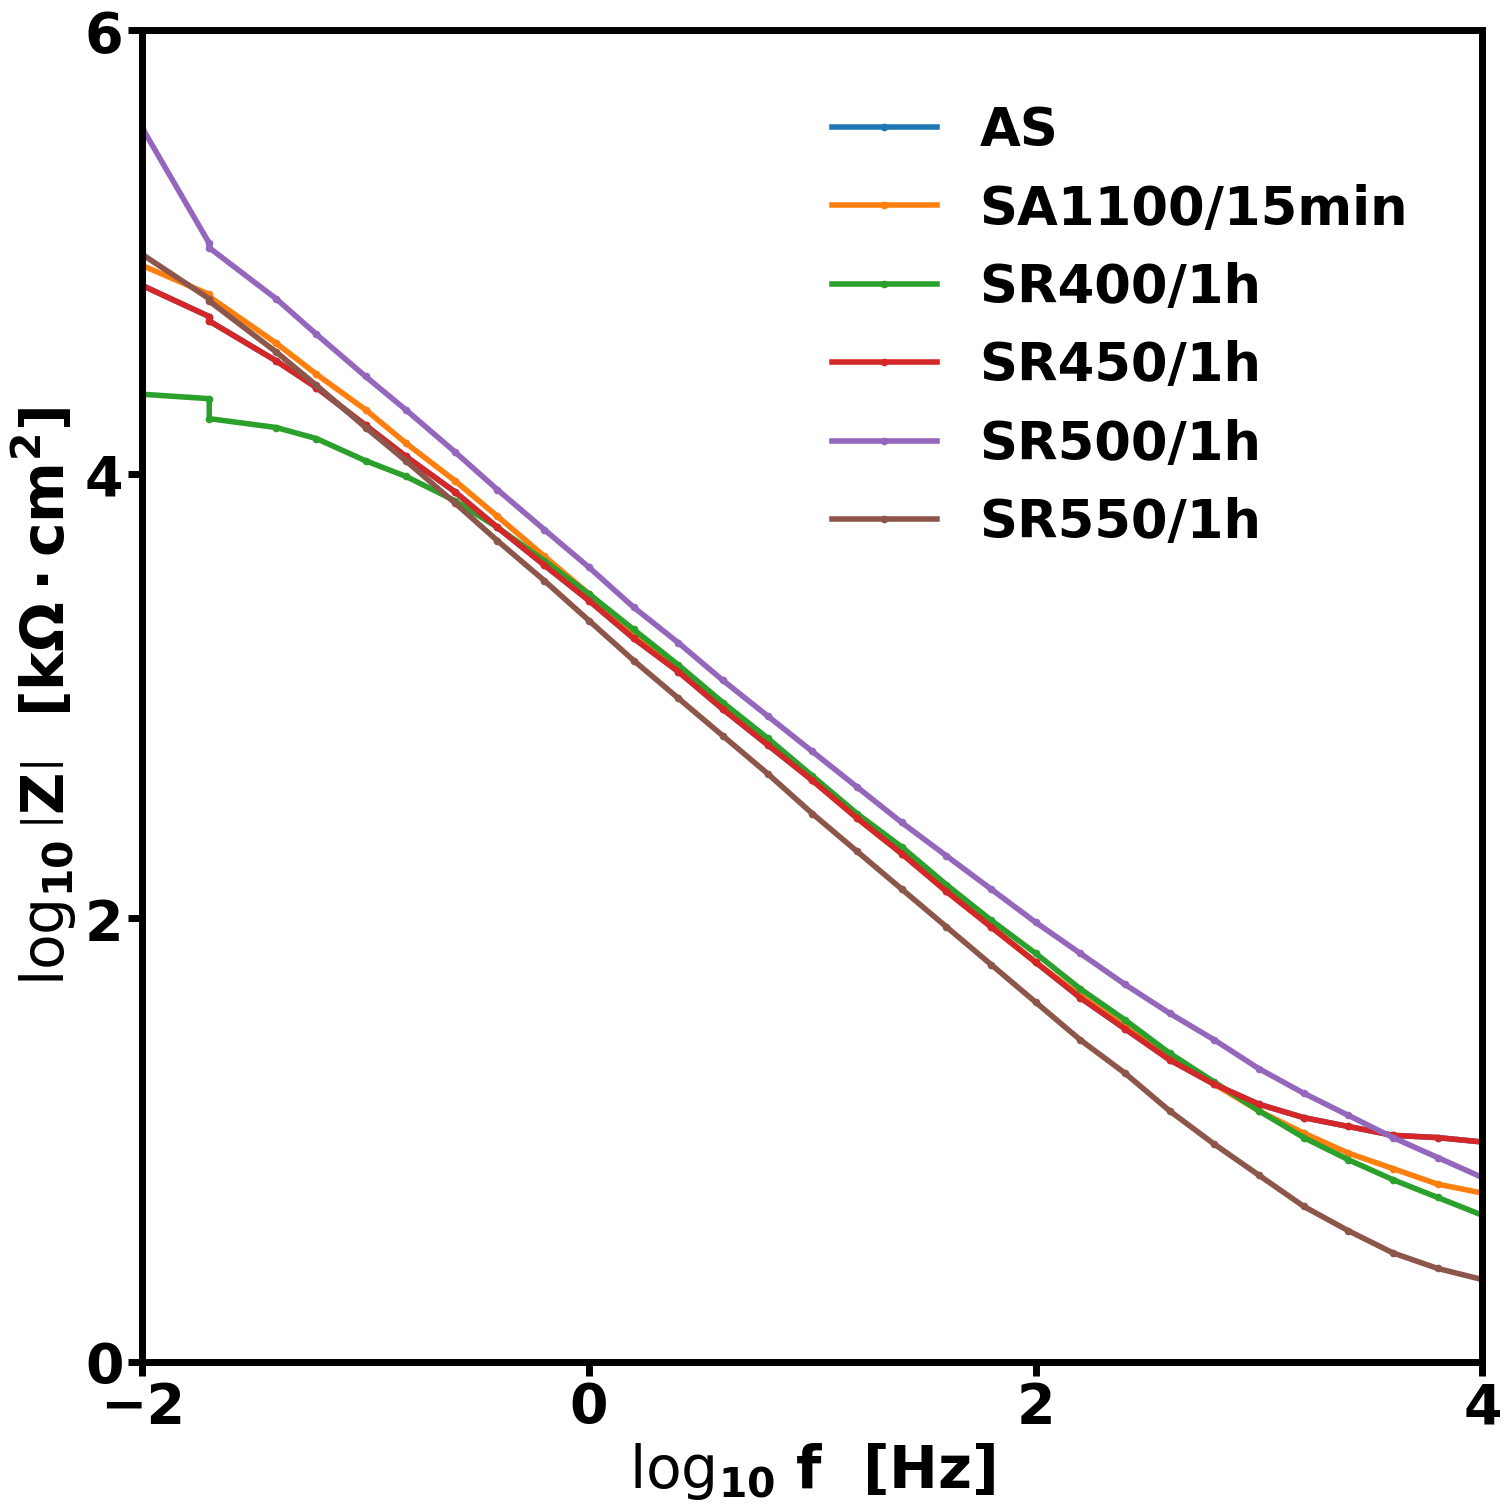

In [23]:
# Bode-magnitude plot — log10|Z| (kΩ·cm²) vs log10 f (Hz)
# Legend top-right; bold fonts; thick frame; x-axis fixed to max=4

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
from google.colab import files  # Colab import

# --- Bold math setup ---
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['mathtext.default'] = 'regular'

# ==== CONFIG ====
FIGSIZE = (15, 15)
YTICKS = [0, 2, 4, 6]
XTICKS = [-2, 0, 2, 4]     # includes the max tick at 4
TICK_FONTSIZE = 40
LABEL_FONTSIZE = 42
LABEL_FONTWEIGHT = 'bold'
LEGEND_FONTSIZE = 38
FRAME_LINEWIDTH = 5
LINE_WIDTH = 4.0
MARKER_SIZE = 4.5
OUTPUT_PNG = "Bode_mag_logZ_vs_Logfreq.png"
OUTPUT_SVG = "Bode_mag_logZ_vs_Logfreq.svg"

# Preferred legend order (only those present will appear)
LEGEND_ORDER = ["AS", "SA1100/15min", "SR400/1h", "SR450/1h", "SR500/1h", "SR550/1h"]

# Filename stem -> pretty legend label
LABEL_MAP = {
    "AS": "AS",
    "SR400_1h": "SR400/1h",
    "SR450_1h": "SR450/1h",
    "SR500_1h": "SR500/1h",
    "SR550_1h": "SR550/1h",
    "SA1100_15min": "SA1100/15min",
}
def pretty_label(path: str) -> str:
    return LABEL_MAP.get(Path(path).stem, Path(path).stem)

# ==== UPLOAD FILES ====
print("📁 Upload your EIS CSV files (AS.csv, SR400_1h.csv, …)")
uploaded = files.upload()
paths = list(uploaded.keys())
if not paths:
    raise RuntimeError("No CSVs uploaded.")

# ---- Helpers ----
def read_any_csv(path):
    for sep in [",", ";", "\t"]:
        try:
            return pd.read_csv(path, sep=sep)
        except Exception:
            pass
    raise RuntimeError(f"Could not parse {path}")

def norm(name: str) -> str:
    # robust normalization: 'log(freq)' -> 'logfreq', 'log(|Z|)'/'log|z|' -> 'logz'
    return "".join(ch for ch in name.lower() if ch.isalnum())

def get_xy(df: pd.DataFrame):
    cols_norm = {norm(c): c for c in df.columns}

    # X-axis: use precomputed log frequency if present
    x = None
    for key in ["logfreq", "logf", "log10freq", "log10f"]:
        if key in cols_norm:
            x = pd.to_numeric(df[cols_norm[key]], errors="coerce").to_numpy()
            break

    # Y-axis: use precomputed log|Z|
    y = None
    for key in ["logz", "logabsz", "logmodz", "log10z"]:
        if key in cols_norm:
            y = pd.to_numeric(df[cols_norm[key]], errors="coerce").to_numpy()
            break

    # Fallbacks (rarely needed)
    if x is None:
        for cand in ["frequencyhz", "frequency", "freq", "f", "f_hz"]:
            if cand in cols_norm:
                f = pd.to_numeric(df[cols_norm[cand]], errors="coerce").to_numpy()
                x = np.log10(f)
                break
    if y is None and "rezxohmcm2" in cols_norm and "-imzxohmcm2" in cols_norm:
        Re = pd.to_numeric(df[cols_norm["rezxohmcm2"]], errors="coerce").to_numpy()
        mIm = pd.to_numeric(df[cols_norm["-imzxohmcm2"]], errors="coerce").to_numpy()
        Zmag_kohmcm2 = np.sqrt(Re**2 + (-mIm)**2) / 1000.0
        y = np.log10(Zmag_kohmcm2)

    if x is None or y is None:
        return None, None

    m = np.isfinite(x) & np.isfinite(y)
    return x[m], y[m]

# ==== PLOT ====
plt.close('all')
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

for path in paths:
    df = read_any_csv(path)
    x, y = get_xy(df)
    if x is None or y is None or len(x) == 0:
        continue
    ax.plot(x, y, marker='o', linewidth=LINE_WIDTH, markersize=MARKER_SIZE,
            label=pretty_label(path))

# Axis labels — bold math
ax.set_xlabel(r"$\mathbf{\log_{10}}\,\mathbf{f}$  [Hz]",
              fontsize=LABEL_FONTSIZE, fontweight=LABEL_FONTWEIGHT)
ax.set_ylabel(r"$\mathbf{\log_{10}}\left|\mathbf{Z}\right|$  [k$\Omega\cdot$cm$^2$]",
              fontsize=LABEL_FONTSIZE, fontweight=LABEL_FONTWEIGHT)

# Ticks
ax.set_xticks(XTICKS)
ax.set_yticks(YTICKS)

# **Fix x-axis to max = 4** (and min = -2 to match your tick set)
ax.set_xlim(min(XTICKS), 4)

# Y-limits: keep requested ticks but allow slight pad if needed
ax.set_ylim(min(YTICKS), max(YTICKS))

# Tick styling
ax.tick_params(axis='both', which='both', width=FRAME_LINEWIDTH, length=10, labelsize=TICK_FONTSIZE)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontweight('bold')

# Frame thickness
for s in ax.spines.values():
    s.set_linewidth(FRAME_LINEWIDTH)

# Legend at TOP-RIGHT (inside), ordered & de-duplicated
handles, labels = ax.get_legend_handles_labels()
lookup = {lab: h for h, lab in zip(handles, labels)}
ordered_labels = [lab for lab in LEGEND_ORDER if lab in lookup] or list(lookup.keys())
ordered_handles = [lookup[lab] for lab in ordered_labels]
leg = ax.legend(
    ordered_handles,
    ordered_labels,
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98),
    fontsize=LEGEND_FONTSIZE,
    frameon=False
)
for txt in leg.get_texts():
    txt.set_fontweight('bold')

# Save
fig.savefig(OUTPUT_PNG, dpi=1200, bbox_inches='tight')
fig.savefig(OUTPUT_SVG, dpi=1200, bbox_inches='tight')
print(f"Saved: {OUTPUT_PNG}, {OUTPUT_SVG}")


📁 Upload your EIS CSV files (AS.csv, SA1100_15min.csv, SR400_1h.csv, SR450_1h.csv, SR500_1h.csv, SR550_1h.csv)


Saving AS.csv to AS (1).csv
Saving SA1100_15min.csv to SA1100_15min.csv
Saving SR400_1h.csv to SR400_1h.csv
Saving SR450_1h.csv to SR450_1h.csv
Saving SR500_1h.csv to SR500_1h.csv
Saving SR550_1h.csv to SR550_1h.csv

=== Plot summary ===
Plotted: AS (1).csv, SA1100_15min.csv, SR400_1h.csv, SR450_1h.csv, SR500_1h.csv, SR550_1h.csv
Skipped: (none)

Saved: Bode_phase_vs_logf.png, Bode_phase_vs_logf.svg


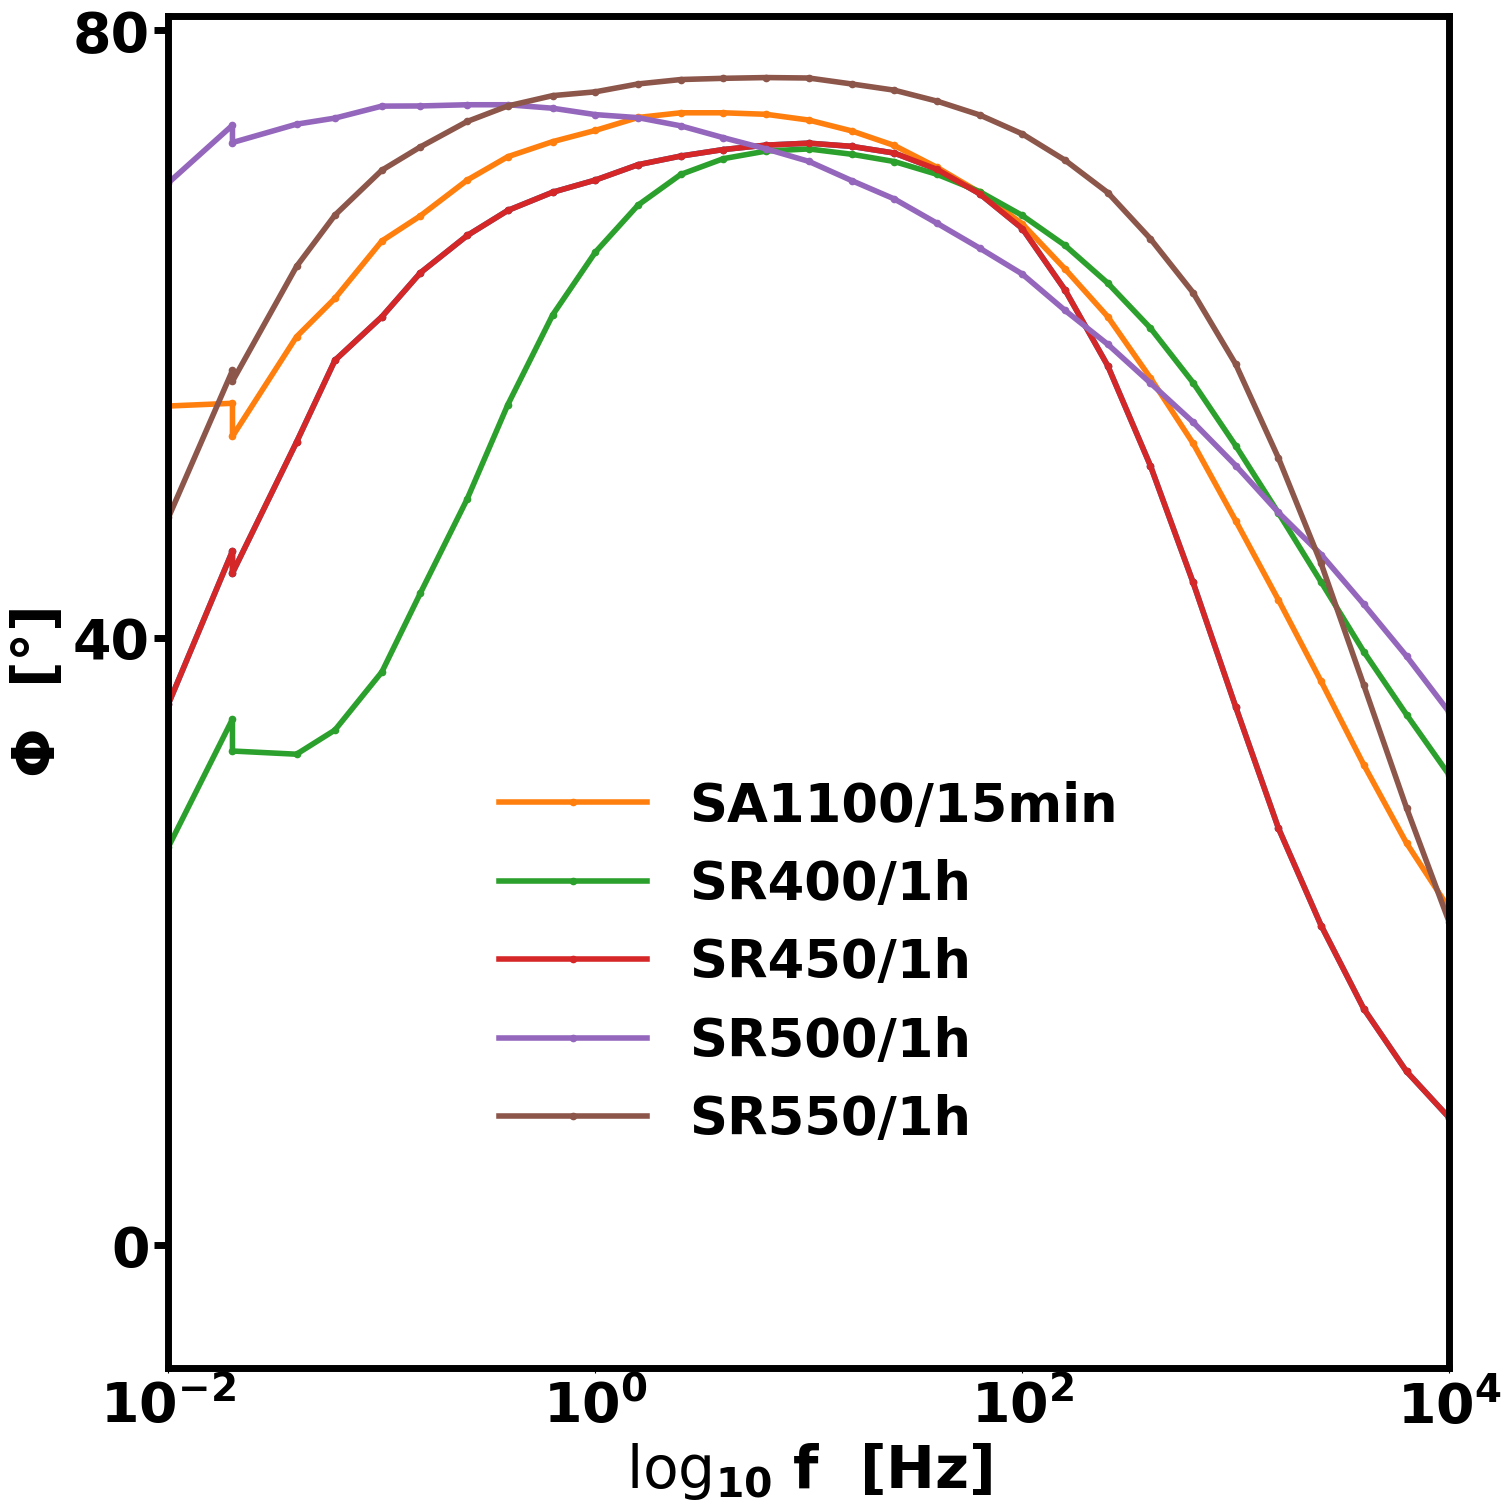

In [5]:
# === Bode PHASE — Φ [°] vs log10 f (Google Colab) ===
# X ticks: 10^-2, 10^0, 10^2, 10^4 (fixed range [-2, 4]); Y ticks: 0, 40, 80
# Legend: centered-right in blank space; prints plotted/skipped summary.

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
from google.colab import files  # Colab import

# Bold math that actually looks bold
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['mathtext.default'] = 'regular'

# --- STYLE ---
FIGSIZE = (15, 15)
XTICKS = [-2, 0, 2, 4]
XTICK_LABELS = [r"$10^{-2}$", r"$10^{0}$", r"$10^{2}$", r"$10^{4}$"]
YTICKS = [0, 40, 80]
TICK_FONTSIZE = 40
LABEL_FONTSIZE = 42
LABEL_FONTWEIGHT = 'bold'
LEGEND_FONTSIZE = 38
FRAME_LINEWIDTH = 5
LINE_WIDTH = 4.0
MARKER_SIZE = 4.5
OUTPUT_PNG = "Bode_phase_vs_logf.png"
OUTPUT_SVG = "Bode_phase_vs_logf.svg"

# Desired legend order + pretty labels
LEGEND_ORDER = ["AS", "SA1100/15min", "SR400/1h", "SR450/1h", "SR500/1h", "SR550/1h"]
LABEL_MAP = {
    "AS": "AS",
    "SR400_1h": "SR400/1h",
    "SR450_1h": "SR450/1h",
    "SR500_1h": "SR500/1h",
    "SR550_1h": "SR550/1h",
    "SA1100_15min": "SA1100/15min",
}
def pretty_label(path: str) -> str:
    return LABEL_MAP.get(Path(path).stem, Path(path).stem)

# --- Upload in Colab ---
print("📁 Upload your EIS CSV files (AS.csv, SA1100_15min.csv, SR400_1h.csv, SR450_1h.csv, SR500_1h.csv, SR550_1h.csv)")
uploaded = files.upload()
paths = list(uploaded.keys())
if not paths:
    raise RuntimeError("No CSVs uploaded.")

# --- Helpers ---
def read_any_csv(path):
    for sep in [",", ";", "\t"]:
        try:
            return pd.read_csv(path, sep=sep)
        except Exception:
            pass
    raise RuntimeError(f"Could not parse {path}")

def norm(name: str) -> str:
    # keep alphanumerics + BOTH phi symbols ('φ' U+03C6 and 'ϕ' U+03D5)
    name = name.lower()
    return "".join(ch for ch in name if ch.isalnum() or ch in {"φ","ϕ"})

def find_logf(df, cols):
    # prefer existing log freq
    for key in ["logfreq","logf","log10freq","log10f"]:
        if key in cols:
            return pd.to_numeric(df[cols[key]], errors="coerce").to_numpy(), None
    # else compute from frequency
    for cand in ["frequencyhz","frequency","freq","f","f_hz"]:
        if cand in cols:
            f = pd.to_numeric(df[cols[cand]], errors="coerce").to_numpy()
            return np.log10(f), None
    # guess 3rd numeric as last resort
    num = df.apply(pd.to_numeric, errors="coerce").select_dtypes(include="number")
    if num.shape[1] >= 3:
        return num.iloc[:, 2].to_numpy(), "guessed the 3rd numeric column as log f"
    return None, "no frequency/log-frequency column found"

def find_phase_deg(df, cols):
    # explicit phase columns (deg or rad); accept φ and ϕ
    for k in ["phi","phideg","phase","phasedeg","φ","ϕ","phase°","anglez","argz","phaseinrad","phaserad"]:
        if k in cols:
            y = pd.to_numeric(df[cols[k]], errors="coerce").to_numpy()
            # If it looks like radians (small magnitude), convert to degrees
            if np.nanmax(np.abs(y)) <= 3.3:
                y = np.degrees(y)
            return y, None
    # compute from Re/Im if available
    re = None
    for rk in ["rezxohmcm2","rez","reohmcm2","realz","real"]:
        if rk in cols:
            re = pd.to_numeric(df[cols[rk]], errors="coerce").to_numpy()
            break
    im = None
    for ik in ["-imzxohmcm2","minusimzxohmcm2","minusimagz","minusim"]:
        if ik in cols:
            im = -pd.to_numeric(df[cols[ik]], errors="coerce").to_numpy()
            break
    if im is None:
        for ik in ["imzxohmcm2","imagz","im","imz"]:
            if ik in cols:
                im = pd.to_numeric(df[cols[ik]], errors="coerce").to_numpy()
                break
    if re is not None and im is not None:
        return np.degrees(np.arctan2(im, re)), None
    return None, "no phase column and insufficient Re/Im to compute phase"

# --- Plot ---
plt.close('all')
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

plotted, skipped = [], []
for p in paths:
    try:
        df = read_any_csv(p)
    except Exception as e:
        skipped.append((Path(p).name, f"parse error: {e}"))
        continue

    cols_norm = {norm(c): c for c in df.columns}
    x, x_msg = find_logf(df, cols_norm)
    y, y_msg = find_phase_deg(df, cols_norm)

    if x is None or y is None:
        skipped.append((Path(p).name, "; ".join([m for m in [x_msg, y_msg] if m])))
        continue

    mask = np.isfinite(x) & np.isfinite(y)
    if not np.any(mask):
        skipped.append((Path(p).name, "no finite values after parsing"))
        continue

    x = x[mask]; y = y[mask]
    ax.plot(x, y, marker='o', linewidth=LINE_WIDTH, markersize=MARKER_SIZE,
            label=pretty_label(p))
    plotted.append(Path(p).name)

# Labels — bold math
ax.set_xlabel(r"$\mathbf{\log_{10}}\,\mathbf{f}$  [Hz]",
              fontsize=LABEL_FONTSIZE, fontweight=LABEL_FONTWEIGHT)
ax.set_ylabel(r"$\boldsymbol{\Phi}$  [°]",
              fontsize=LABEL_FONTSIZE, fontweight=LABEL_FONTWEIGHT)

# X ticks & fixed limits (10^-2 to 10^4)
ax.set_xticks(XTICKS)
ax.set_xticklabels(XTICK_LABELS, fontsize=TICK_FONTSIZE, fontweight='bold')
ax.set_xlim(-2, 4)

# Y ticks
ax.set_yticks(YTICKS)
ax.tick_params(axis='y', which='both', width=FRAME_LINEWIDTH, length=10, labelsize=TICK_FONTSIZE)
for t in ax.get_yticklabels():
    t.set_fontweight('bold')

# Frame thickness
for s in ax.spines.values():
    s.set_linewidth(FRAME_LINEWIDTH)

# Legend in center-right blank space (float; translucent backdrop)
handles, labels = ax.get_legend_handles_labels()
lookup = {lab: h for h, lab in zip(handles, labels)}
ordered_labels  = [lab for lab in LEGEND_ORDER if lab in lookup] or list(lookup.keys())
ordered_handles = [lookup[lab] for lab in ordered_labels]
leg = ax.legend(
    ordered_handles, ordered_labels,
    loc="center", bbox_to_anchor=(0.5, 0.3),
    fontsize=LEGEND_FONTSIZE, frameon=True,
    borderpad=0.6, labelspacing=0.5, handlelength=2.8,
)
leg.get_frame().set_alpha(0.75)
leg.get_frame().set_linewidth(0)
for txt in leg.get_texts():
    txt.set_fontweight("bold")

# Save
fig.savefig(OUTPUT_PNG, dpi=1200, bbox_inches='tight')
fig.savefig(OUTPUT_SVG, dpi=1200, bbox_inches='tight')

# Summary
print("\n=== Plot summary ===")
print("Plotted:", ", ".join(plotted) if plotted else "(none)")
if skipped:
    print("Skipped:")
    for name, reason in skipped:
        print(f"  - {name}: {reason}")
else:
    print("Skipped: (none)")
print(f"\nSaved: {OUTPUT_PNG}, {OUTPUT_SVG}")
